## Imports

In [38]:
import numpy as np
import pandas as pd
from scipy.io import arff
from matplotlib import pyplot as plt

## Reading Data

In [39]:
# Change filename here
filename = 'CM1.arff.txt'

data = arff.loadarff(filename)
loaddata = pd.DataFrame(data[0])
loaddata.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,2.0,3.0,0.0,0.0,8.0,4.0,2.0,0.22,2.0,2.00,...,6.0,0.22,5.0,10.0,4.0,7.0,9.0,47.06,9.0,b'N'
1,3.0,3.0,0.0,2.0,2.0,4.0,2.0,0.15,2.0,2.00,...,5.0,0.11,10.0,22.0,5.0,12.0,19.0,26.67,13.0,b'N'
2,38.0,35.0,4.0,5.0,70.0,58.0,18.0,0.17,24.0,2.42,...,51.0,0.08,150.0,222.0,58.0,32.0,218.0,41.90,109.0,b'N'
3,1.0,7.0,5.0,0.0,12.0,12.0,4.0,0.10,6.0,2.00,...,18.0,0.06,50.0,79.0,36.0,19.0,68.0,22.64,41.0,b'Y'
4,9.0,15.0,4.0,14.0,22.0,28.0,8.0,0.20,14.0,2.00,...,24.0,0.11,29.0,64.0,19.0,18.0,73.0,57.14,41.0,b'N'


## Acquire X and Y values

In [40]:
software_metrics = np.array(loaddata[['LOC_BLANK','BRANCH_COUNT','CALL_PAIRS','LOC_CODE_AND_COMMENT']])
labels = np.array(loaddata['Defective'])

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(software_metrics, labels, test_size = 0.1)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

## Selecting a Model (Logistic Regression)

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logreg.predict(X_test)
predictions

array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype='<U1')

## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted Non-Defective', "Predicted Defective"], index=['Actual Non-Defective', 'Actual Defective'])

,Predicted Non-Defective,Predicted Defective
Actual Non-Defective,29,1
Actual Defective,3,0


In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 0
False Positives: 1
True Negatives: 29
False Negatives: 3


## Prediction Possibilities

In [46]:
y_test

array(['Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype='<U1')

In [47]:
X_test

array([[  0.,   5.,   2.,   2.],
       [  6.,   9.,   2.,   1.],
       [  3.,   3.,   2.,   6.],
       [ 31.,  19.,   5.,  12.],
       [ 77.,  19.,   6.,   4.],
       [ 36.,  13.,   5.,   6.],
       [164., 110.,  26.,  37.],
       [ 21.,  31.,  10.,  13.],
       [  0.,   5.,   2.,   0.],
       [  4.,  13.,   2.,   1.],
       [ 12.,   7.,   8.,   3.],
       [  2.,   3.,   0.,   0.],
       [ 15.,  11.,   4.,   9.],
       [  5.,   5.,   0.,   0.],
       [  6.,   7.,   0.,   6.],
       [  1.,   3.,   0.,   3.],
       [  4.,   9.,   0.,   0.],
       [ 34.,   3.,   4.,  11.],
       [  6.,   3.,   1.,   1.],
       [  4.,   3.,   0.,   3.],
       [ 22.,  23.,   7.,   3.],
       [ 14.,   5.,   1.,   3.],
       [  7.,   3.,   3.,   0.],
       [ 17.,  29.,   0.,  19.],
       [ 10.,  11.,   2.,   2.],
       [ 17.,  21.,   4.,   1.],
       [  8.,  19.,   4.,   6.],
       [  4.,   3.,   0.,   0.],
       [  1.,   3.,   4.,   0.],
       [ 77.,  49.,   9.,  20.],
       [ 2

In [48]:
random_probs = [0 for _ in range(len(y_test))]
logreg_probs = logreg.predict_proba(X_test)

Keep probabilities of positive outcome only

In [49]:
logreg_probs = logreg_probs[:, 1]

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

## Computing AUC values

In [51]:
random_auc = roc_auc_score(y_test,random_probs)
logreg_auc = roc_auc_score(y_test,logreg_probs)

In [52]:
print(f'Random Chance Prediction: ROC AUC = {random_auc}')
print(f'Logisitc Regression: ROC AUC = {logreg_auc}')

Random Chance Prediction: ROC AUC = 0.5
Logisitc Regression: ROC AUC = 0.4777777777777778


### Computing ROC Curve

In [53]:
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs, pos_label='Y')
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs, pos_label='Y')

### Plotting ROC Curve

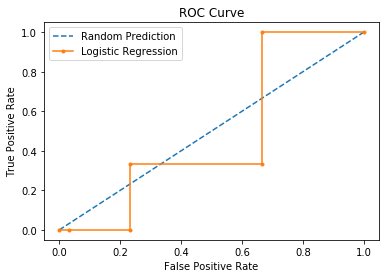

In [54]:
plt.plot(random_fpr,random_tpr,linestyle='--',label='Random Prediction')
plt.plot(logreg_fpr,logreg_tpr,marker='.',label='Logistic Regression')

# Title of Curve
plt.title('ROC Curve')
# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend()
# Show Show
plt.show()